In [161]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import numpy as np
# Reconstruir dataset iris


In [162]:
iris = load_iris()
dt = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
dt

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [163]:
y_iris = iris["target"]

In [164]:
# Hacer árbol de clasificación iris con max_depth 2, semilla 800
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf.fit(dt, y_iris)
accuracy_score(y_iris, tree_clf.predict(dt))

0.96

In [165]:
# Hacer PCA con 3 componentes
std = StandardScaler()
dt_std = std.fit_transform(dt)
dt_std = pd.DataFrame(data=dt_std, columns=iris["feature_names"])
dt_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [166]:
pca = PCA(n_components=4)
pca.fit(dt_std)

PCA(n_components=4)

In [167]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [168]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [169]:
pca_3 = PCA(n_components=3)
pca_3.fit(dt_std)

PCA(n_components=3)

In [170]:
pca_3.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [171]:
proyecciones = np.dot(pca_3.components_, std.transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', "PC2", "PC3"])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [172]:
# Hacer el árbol usando el PCA
tree_clf_3 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_3.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_3.predict(proyecciones))

0.9333333333333333

In [173]:
proyecciones = np.dot(pca_3.components_[:2], std.transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', "PC2"])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [174]:
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_2.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_2.predict(proyecciones))

0.9333333333333333

In [175]:
proyecciones.drop(columns=["PC2"], inplace=True, errors="ignore")
proyecciones

,PC1
0,-2.264703
1,-2.080961
2,-2.364229
3,-2.299384
4,-2.389842
...,...
145,1.870503
146,1.564580
147,1.521170
148,1.372788


In [176]:
tree_clf_1 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_1.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_1.predict(proyecciones))

0.9333333333333333

In [177]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

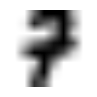

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 2))
plt.imshow(X_digits[44:45].reshape(8, 8), cmap="binary",
               interpolation="bilinear")
plt.axis('off')
dogo = plt.imread("img/my_doggo_sample.jpeg")


In [192]:
dogo.shape

(793, 1280, 3)

In [193]:
std = StandardScaler()
std.fit(dogo)
X_std = std.transform(dogo)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [180]:
pca = PCA(n_components=X_digits.shape[1])
pca.fit(X_std)

PCA(n_components=64)

In [181]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

In [182]:
proyecciones = np.dot(pca.components_[:62], X_std.T)
proyecciones = pd.DataFrame(proyecciones)
proyecciones = proyecciones.transpose()
proyecciones

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,-0.108361,0.017914,0.217284,-0.184659,-0.152393,0.486203,0.009390,-0.009188,-0.027512,-4.953307e-16
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,-0.048471,0.395305,0.005322,0.267950,-0.511874,-0.422479,-0.090586,0.127878,-0.103101,-1.222385e-16
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,-0.081455,0.310967,0.178624,0.067011,0.112209,0.034327,0.444446,-0.518823,0.179429,-5.780292e-16
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,0.128994,0.759133,-0.115443,0.264125,0.018912,-0.153687,0.275277,-0.115922,0.101748,1.349624e-16
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,0.172144,-0.281930,-0.335099,-0.098695,0.292078,0.157340,-0.122873,-0.084901,-0.072045,-1.961081e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,...,0.155490,0.082703,-0.172645,-0.255690,-0.041558,-0.301991,-0.041755,0.009942,0.111765,9.163577e-16
1793,2.423234,-1.429611,-3.045245,2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,...,0.134441,0.275664,-0.186876,-0.424451,-0.249359,-0.183744,0.422494,0.374617,-0.138655,-1.293335e-16
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,...,0.606454,-0.294003,-0.177343,-0.048974,0.002683,0.081608,0.442114,0.061053,-0.102153,8.088638e-17
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,...,0.227673,0.377716,-0.320746,-0.025126,-0.098597,0.083542,-0.300143,-0.306155,-0.594146,-1.924260e-16


In [183]:
pca_60 = PCA(n_components=62)
pca_60.fit(X_std)
X_back = pca_60.inverse_transform(X=proyecciones)

(-0.5, 7.5, 7.5, -0.5)

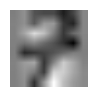

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 2))
plt.imshow(X_back[44:45].values.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
plt.axis('off')